In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from numpy import median


def line_plot(filename: str, df, x: str, y: list, groups=None):
    def q1(x):
        return x.quantile(0.25)

    def q3(x):
        return x.quantile(0.75)

    vals = dict([(key, [q1, q3, median]) for key in y])

    summary = df.groupby(groups + [x]).agg(vals)
    summary.columns = ["_".join(col).replace("_", "") for col in summary.columns.to_flat_index()]
    summary.reset_index(inplace=True)

    key_df = df.drop_duplicates(subset=groups)

    for i in range(len(key_df)):
        tmp = summary
        current_filename = filename
        for key in groups:
            tmp = tmp[tmp[key] == key_df[key].iloc[i]]
            current_filename += f"_{key_df[key].iloc[i]}"
        tmp.to_csv(f"{current_filename}.txt".replace("_", ""), sep="\t", index=False)


def shorten_file(file, ys):
    df = pd.read_csv(file, sep="\t")
    df["keep"] = True
    for idx in range(len(df) - 1):
        different = False
        for y in ys:
            if df[y].iloc[idx] != df[y].iloc[idx - 1]:
                different = True
                break
        if different:
            df["keep"].iloc[idx - 1] = True
        else:
            df["keep"].iloc[idx] = False
    ddf = df[df["keep"] == True]
    ddf.to_csv(file.replace(".txt", "s.txt"), index=False, sep="\t")

In [68]:
standard_df = pd.read_csv("data/hard_setting.csv")
standard_df["setting"] = "difficult"
easy_df = pd.read_csv("data/easy_setting.csv")

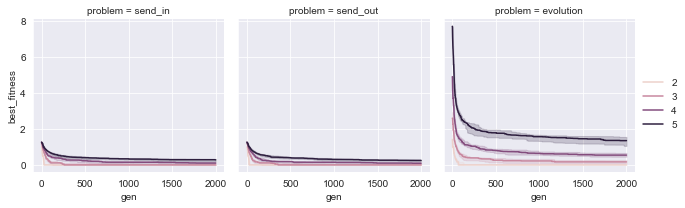

In [66]:
g = sns.FacetGrid(standard_df, col="problem")
g.map_dataframe(sns.lineplot, x="gen", y="best_fitness", hue="n", estimator="median", errorbar=("pi", 50))
g.add_legend()
plt.show()

In [52]:
line_plot("results/pgfplots/lp", standard_df, "gen", ["best_fitness"], groups=["problem", "setting", "n"])
for p in ["sendin", "sendout", "evolution"]:
    for n in range(2, 6):
        f = f"results/pgfplots/lp{p}difficult{n}.txt"
        shorten_file(f, ["bestfitnessmedian", "bestfitnessq1", "bestfitnessq3"])

C:\Users\giorg\AppData\Local\Temp/ipykernel_11368/654610735.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["keep"].iloc[idx - 1] = True
C:\Users\giorg\AppData\Local\Temp/ipykernel_11368/654610735.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["keep"].iloc[idx] = False
C:\Users\giorg\AppData\Local\Temp/ipykernel_11368/654610735.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["keep"].iloc[idx - 1] = True
C:\User

In [53]:
total = standard_df.groupby(["problem", "setting", "n"]).seed.nunique().reset_index()
total.rename(columns={"seed": "total"}, inplace=True)
zeros = standard_df[standard_df["best_fitness"] == 0].groupby(["problem", "setting", "n"]).seed.nunique().reset_index()
zeros.rename(columns={"seed": "zeros"}, inplace=True)
summary = pd.merge(total, zeros, how="left")
summary["zeros"] = summary["zeros"].fillna(0)
summary["fraction"] = summary["zeros"] / summary["total"]
pivot_summary = pd.pivot(summary, index=["problem", "setting"], columns="n", values=["total", "zeros", "fraction"])
pivot_summary.head(10)

total                   zeros                 fraction  \
n                       2     3     4     5     2     3    4    5        2   
problem   setting                                                            
evolution difficult  30.0  30.0  30.0  30.0  30.0   5.0  0.0  0.0      1.0   
send_in   difficult  30.0  30.0  30.0  30.0  30.0  24.0  2.0  0.0      1.0   
send_out  difficult  30.0  30.0  30.0  30.0  30.0  27.0  5.0  0.0      1.0   

                                              
n                           3         4    5  
problem   setting                             
evolution difficult  0.166667  0.000000  0.0  
send_in   difficult  0.800000  0.066667  0.0  
send_out  difficult  0.900000  0.166667  0.0

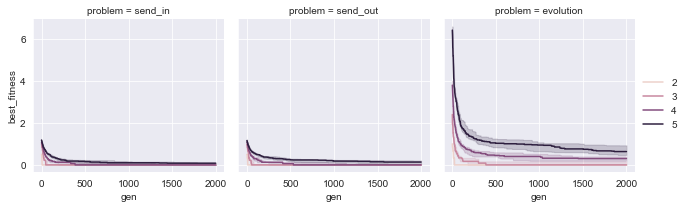

In [69]:
g = sns.FacetGrid(easy_df, col="problem")
g.map_dataframe(sns.lineplot, x="gen", y="best_fitness", hue="n", estimator="median", errorbar=("pi", 50))
g.add_legend()
plt.show()

In [70]:
line_plot("results/pgfplots/lp", easy_df, "gen", ["best_fitness"], groups=["problem", "setting", "n"])
for p in ["sendin", "sendout", "evolution"]:
    for n in range(2, 6):
        f = f"results/pgfplots/lp{p}easy{n}.txt"
        shorten_file(f, ["bestfitnessmedian", "bestfitnessq1", "bestfitnessq3"])

C:\Users\giorg\AppData\Local\Temp/ipykernel_11368/654610735.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["keep"].iloc[idx - 1] = True
C:\Users\giorg\AppData\Local\Temp/ipykernel_11368/654610735.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["keep"].iloc[idx] = False
C:\Users\giorg\AppData\Local\Temp/ipykernel_11368/654610735.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["keep"].iloc[idx - 1] = True
C:\User

In [71]:
total = easy_df.groupby(["problem", "setting", "n"]).seed.nunique().reset_index()
total.rename(columns={"seed": "total"}, inplace=True)
zeros = easy_df[easy_df["best_fitness"] == 0].groupby(["problem", "setting", "n"]).seed.nunique().reset_index()
zeros.rename(columns={"seed": "zeros"}, inplace=True)
summary = pd.merge(total, zeros, how="left")
summary["zeros"] = summary["zeros"].fillna(0)
summary["fraction"] = summary["zeros"] / summary["total"]
pivot_summary = pd.pivot(summary, index=["problem", "setting"], columns="n", values=["total", "zeros", "fraction"])
pivot_summary.head(10)

total                   zeros                   fraction  \
n                     2     3     4     5     2     3     4     5        2   
problem   setting                                                            
evolution easy     30.0  30.0  30.0  30.0  30.0  20.0   2.0   0.0      1.0   
send_in   easy     30.0  30.0  30.0  30.0  30.0  30.0  26.0  13.0      1.0   
send_out  easy     30.0  30.0  30.0  30.0  30.0  30.0  26.0   8.0      1.0   

                                                 
n                         3         4         5  
problem   setting                                
evolution easy     0.666667  0.066667  0.000000  
send_in   easy     1.000000  0.866667  0.433333  
send_out  easy     1.000000  0.866667  0.266667